In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import pandas as pd
import glob
import pickle
import numpy as np
from csslconstants import *
from cmcrameri import cm
import rioxarray as rxr
from metloom.pointdata import CDECPointData
from metloom.variables import CdecStationVariables
import metloom
import geopandas as gpd
import datetime


homedir = '/home/marianne/Documents/cssltimeseries/'
homedir = '/global/home/users/cowherd/cssltimeseries/'
datadir = homedir + 'data/'
os.chdir(homedir)

datakeys = ['Date', 'Air Temp Max (C)', 'Air Temp Min (C)',
       '24-hour Total Precip (mm)', 'Season Total Precip (mm)',
       '% of Precip as Snow', '% of Precip as Rain', 'New Snow (cm)',
       'Season Total Snow (cm)', 'Snowpack depth (cm)',
       'Snow Water Equivalent (cm)', 'Remarks', 'dt']


In [3]:
dnbr = rxr.open_rasterio(datadir + 'caldor/caldor-dNBR.tiff')
p21 = gpd.read_file('/global/scratch/users/cowherd/snow_fires_data/InteragencyPerimeters2021/FH_Perimeter.shp')
caldor = p21[p21.OBJECTID==13419]
caldor.to_file(datadir + 'caldor/caldor.shp')
snowzone = gpd.read_file('/global/scratch/users/cowherd/snowzone/snowzone.shp')

/global/scratch/users/cowherd/.conda/envs/earthenv/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [4]:
vrs = [
    CdecStationVariables.SWE,
    CdecStationVariables.SNOWDEPTH
]
points = CDECPointData.points_from_geometry(caldor, vrs, snow_courses=True)
df = points.to_dataframe()
print(df)


            name   id datasource                                  geometry
0    FREEL BENCH  FBN       CDEC  POINT Z (-119.95000 38.85000 7300.00000)
1   LAKE AUDRAIN  ABN       CDEC  POINT Z (-120.03932 38.81983 7300.00000)
2       PHILLIPS  PHL       CDEC  POINT Z (-120.07200 38.81800 6800.00000)
3    ECHO SUMMIT  ECS       CDEC  POINT Z (-120.03898 38.82852 7450.00000)
4  TAMARACK FLAT  TMF       CDEC  POINT Z (-120.10300 38.80300 6550.00000)
5    CAPLES LAKE  CAP       CDEC  POINT Z (-120.04158 38.71079 8000.00000)
6          ALPHA  APH       CDEC  POINT Z (-120.21564 38.80414 7600.00000)


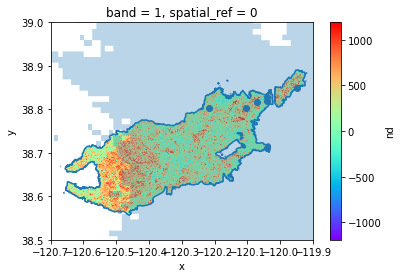

In [5]:
fig,ax=plt.subplots()
dnbr.plot(ax=ax,cmap = 'rainbow')
caldor.boundary.plot(ax=ax)
df.plot(ax=ax)
snowzone.plot(ax=ax, alpha =0.3)
ax.set_xlim((-120.7,-119.9))
ax.set_ylim((38.5,39))
plt.show()

In [6]:
tmp  = metloom.pointdata.cdec.CDECPointData('FBN', 'FREEL BENCH', metadata=None)
tmp.get_snow_course_data(start_date = datetime.datetime(2019,1,1), end_date = datetime.datetime(2022,1,1), variables = vrs)

,,geometry,measurementDate,SWE,SWE_units,SNOWDEPTH,SNOWDEPTH_units,datasource
datetime,site,,,,,,,
2019-02-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2018-12-31 08:00:00+00:00,8.0,INCHES,24.0,INCHES,CDEC
2019-03-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2019-02-28 08:00:00+00:00,18.0,INCHES,56.0,INCHES,CDEC
2019-04-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2019-03-28 08:00:00+00:00,21.5,INCHES,56.0,INCHES,CDEC
2020-02-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2020-01-30 08:00:00+00:00,5.0,INCHES,17.0,INCHES,CDEC
2020-03-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2020-02-28 08:00:00+00:00,3.5,INCHES,9.0,INCHES,CDEC
2020-04-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2020-03-26 08:00:00+00:00,4.5,INCHES,23.0,INCHES,CDEC
2021-02-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2021-01-29 08:00:00+00:00,6.5,INCHES,29.0,INCHES,CDEC
2021-03-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2021-02-25 08:00:00+00:00,6.5,INCHES,20.0,INCHES,CDEC
2021-04-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2021-03-30 08:00:00+00:00,6.0,INCHES,16.0,INCHES,CDEC


In [7]:
## get fires in the caldor area
mtbs = gpd.read_file('/global/scratch/users/cowherd/mtbs_perimeter_data/mtbs_perims_DD.shp').to_crs('epsg:4326')
eldorado = gpd.read_file('/global/home/users/cowherd/pyrodiversity/data/spatial/eldorado_huc8/eldoradohuc8.shp').to_crs('epsg:4326')

In [8]:
# localfirep = gpd.sjoin(mtbs, eldorado)
# localfirep.keys()
years = [int(localfirep['Ig_Date'][i][0:4]) for i in localfirep.index]
start_days =[]
for i in localfirep.index:
    date = localfirep['Ig_Date'][i]
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:])
    doy = datetime.date(year = year, month=month, day = day).strftime('%j')
    start_days.append(int(doy))


NameError: name 'localfirep' is not defined

In [ ]:
start_days

In [ ]:
fig,ax=plt.subplots()
eldorado.boundary.plot(ax=ax,color='g')
output.boundary.plot(ax=ax,color='r')
plt.show()

In [ ]:
output = gpd.GeoDataFrame(data = {'FIRE_NAME': localfirep['Incid_Name'],
                             'OBJECTID': localfirep['Event_ID'],
                             'Fire_Year': years},
                         geometry = localfirep.geometry)

In [ ]:
output.to_file('/global/home/users/cowherd/pyrodiversity/data/spatial/eldoradofirep.shp')